1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante regresión logística, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]]
- ¿Qué acierto tiene tu modelo? (score)
- Utiliza un conjunto de test con el 40% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Virginica" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras la regresión logística un buen algoritmo para estos datos? ¿por qué?

In [8]:
# Imports 

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df = pd.read_csv("../data/iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df.shape

(150, 5)

In [6]:
# To encode our target column
le = preprocessing.LabelEncoder()
le.fit(df["variety"])
df["target"] = le.transform(df["variety"])

In [7]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,target
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


In [11]:
# Independent variables
X = np.array(df.drop(["variety", "target"], axis = 1))

# Dependent variable
y = np.array(df["target"])

# Test and Train data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Model
model = linear_model.LogisticRegression(max_iter = 200)

# Training
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

### Mediante regresión logística, predice qué planta se corresponde con los ejemplos: [15.7,2.8,9.5,0.1] y [1.7,3.8,4.5,11.3]

In [27]:
example_1 = np.array([15.7,2.8,9.5,0.1]).reshape(1, -1)
example_2 = np.array([1.7,3.8,4.5,11.3]).reshape(1, -1)

# Prediction
prediction_1 = model.predict(example_1)
prediction_2 = model.predict(example_2)

# Transformation into string label
prediction_1 = le.inverse_transform(prediction_1)
prediction_2 = le.inverse_transform(prediction_2)

print(f"Prediction 1: {prediction_1}")
print(f"Prediction 2: {prediction_2}")

Prediction 1: ['Virginica']
Prediction 2: ['Virginica']


### ¿Qué acierto tiene tu modelo? (score)

In [29]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print(f"train score: {train_score}")
print(f"test score: {test_score}")

train score: 0.9666666666666667
test score: 1.0


### Utiliza un conjunto de test con el 40% de los datos: ¿cambian los resultados anteriores? ¿por qué?

In [30]:
# Test and Train data
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.4, random_state = 0)

# Model
model_2 = linear_model.LogisticRegression(max_iter = 200)

# Training
model_2.fit(x_train_2, y_train_2)

LogisticRegression(max_iter=200)

In [31]:
train_score_2 = model_2.score(x_train_2, y_train_2)
test_score_2 = model_2.score(x_test_2, y_test_2)

print(f"train score 2: {train_score_2}")
print(f"test score 2: {test_score_2}")

train score 2: 0.9777777777777777
test score 2: 0.9166666666666666


Como era de esperar, el score empeora porque el modelo tiene menos datos para identificar los patrones de las diferentes clases.

### Elimina la clase "Virginica" de tus datos. Repite el proceso anterior, ¿cambian los resultados?

In [33]:
df2 = df[df["variety"] != "Virginica"]
df2.shape

(100, 6)

In [35]:
# Independent variables
X2 = np.array(df2.drop(["variety", "target"], axis = 1))

# Dependent variable
y2 = np.array(df2["target"])

# Test and Train data
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

# Model
model_3 = linear_model.LogisticRegression(max_iter = 200)

# Training
model_3.fit(x_train_3, y_train_3)

LogisticRegression(max_iter=200)

In [36]:
train_score_3 = model_3.score(x_train_3, y_train_3)
test_score_3 = model_3.score(x_test_3, y_test_3)

print(f"train score 3: {train_score_3}")
print(f"test score 3: {test_score_3}")

train score 3: 1.0
test score 3: 1.0


El score aumenta porque tiene menos clases que diferenciar, lo cual además disminuye la probabilidad de error (1/2 en vez de 1/3)

### ¿Consideras la regresión logística un buen algoritmo para estos datos? ¿por qué?



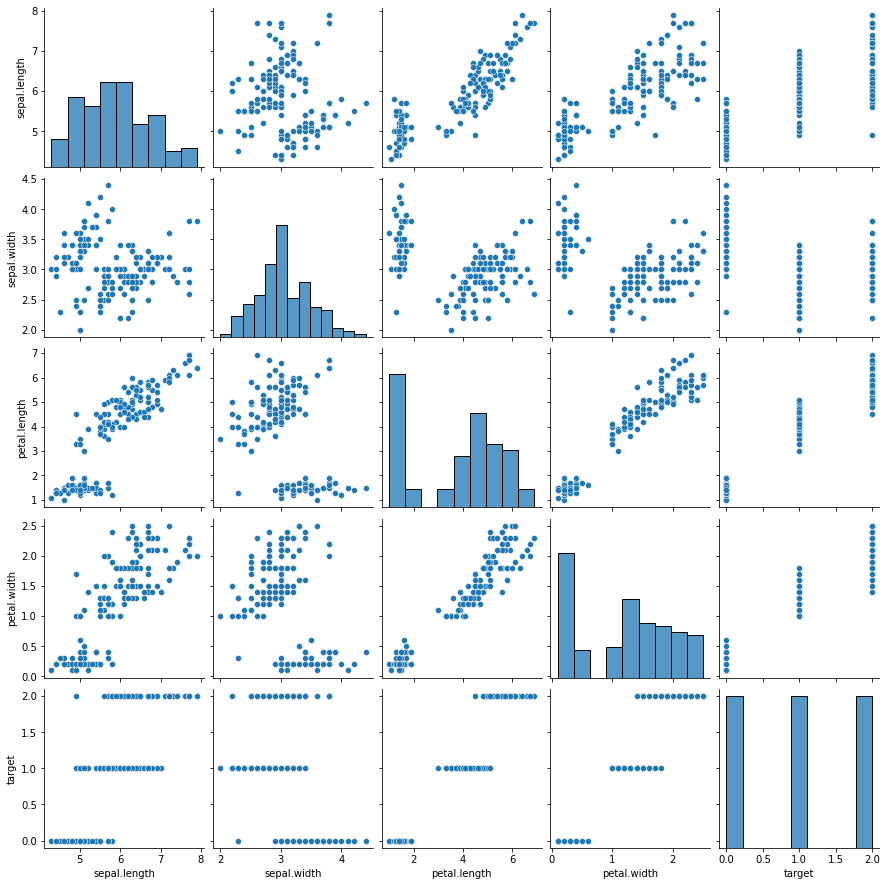

In [37]:
sns.pairplot(df)

El modelo de gresión logística parece una buena opción para estos datos por varios motivos:

1. Las predicciones son categorías (números discretos)
2. Obtenemos un buen score tanto en train como en test
3. Como podemos ver en el pairplot en la columna target, las variables independientes tienen relaciones aprox. lineales con la dependiente.


Aún así, para otros datos en los que no exista una relación lineal entre las variables independientes y la dependiente, este modelo no es una buena idea.